# Lab 3 - Visualization

Last update: 11/11/2023

- Name: Truong Van Chi
- Student ID: 21127021

***

## Work and submission guidelines

**Work on your assignment**

- You need to do your assignment directly in this notebook. First, fill out your name and ID at the beginning of the file. In the notebook, fill in places that say:
```python
#TODO
```

- During your work, you can print out the result, create more cells to test, or create more functions to handle things. Please note that <font color=red>you are not allowed to delete or modify my code cells</font> (except in the case that mentioned above). Remember to remove `raise NotImplementedError("not implement")` when running the code.

- Always press `Ctrl + S` in order to save your work.

**Notes:**

    *  Copy means zero
    *  You have to submit your work on time. No exception
    *  Any questions about your grade are based on the assignment submitted on Moodle
    *  Wrong submission takes you -2 points

**Submit your work**

- When grading your assignment, I will choose `Kernel` - `Restart Kernel & Run All Cells` in order to restart the kernel and run all cells in your notebook. Therefore, you should do that before submitting to ensure that the outputs are all as expected.

- After that, rename you notebook with your student ID (e.g. `1234567.ipynb`) and submit on Moodle.

- <font color=red>Please strictly follow the submission rules.</font>

## Abstract and general requirements

**Abstract**

- In this assignment, you are required to visualize data and results. This task is very important since it provides reader (your clients, your boss,...) an overview of the data as well as your results.

- You will visualize the data in order to answer some questions. By answering these questions, you are able to get some insights from data.

- You will also visualize the results of machine learning model to be able to know whether your model works well or not.

**General requirements**

- Every charts **must have their own name, axes name, legends**.
- The charts you draw must not only be correct but also beautiful:
    - The correctness is shown in choosing the right chart and accurately calculating the data to draw the chart.
    - The beauty is expressed in the UI/UX of the chart. The beauty of UI is shown in choosing the colors, layout of the chart. The beauty of UX is reflected in the fact that the reader can easily capture your message conveyed through your notebook.

---

In [1]:
# visialize stuff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import json
# !pip install geopandas
import geopandas

# modeling stuff
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import random

## Data visualization

- In this section, you are going to compute and visualize some information about Covid-19
- The data prepared in `./data` was collected from Worldometer
- Link: https://www.worldometers.info/coronavirus/

In [2]:
# read the data into a dataframe
df = pd.read_csv('./data/data.csv')
print(f'Shape: {df.shape}')
df.head(5)

Shape: (219, 10)


,Country Name,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Total Tests,Population
0,USA,"31,990,143",NaN,"576,298",NaN,"24,560,856","6,852,989","9,321","420,822,699","332,516,170"
1,India,"13,689,453","+3,380","171,089",NaN,"12,253,697","1,264,667","8,944","259,207,108","1,390,568,032"
2,Brazil,"13,521,409",NaN,"355,031",NaN,"11,957,068","1,209,310","8,318","28,600,000","213,737,070"
3,France,"5,067,216",NaN,"99,135",NaN,"310,934","4,657,147","5,916","70,140,847","65,386,285"
4,Russia,"4,657,883","+8,173","103,601",338.0,"4,281,776","272,506","2,300","124,100,000","145,983,351"


### Requrement #1: Preprocess

- **TODO**: Take a look at the data files, then go to the URL aforementioned, explore the meaning of columns in the dataset and fill in the blanks:
    - Country Name: Tên của quốc gia
    - Total Cases: Tổng số ca nhiễm
    - New Cases: Số ca nhiễm mới
    - Total Deaths: Tổng số ca chết
    - New Deaths: Số ca chết mới
    - Total Recovered: Tổng số ca bình phục
    - Active Cases: Số ca nhiễm bệnh hiện tại
    - Critical Cases: Số ca nguy kịch
    - Total Tests: Tống số lần kiểm tra covid
    - Population: Dân số của quốc gia

- Check the data with `info()` function

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    object 
 2   New Cases        46 non-null     object 
 3   Total Deaths     219 non-null    object 
 4   New Deaths       32 non-null     float64
 5   Total Recovered  217 non-null    object 
 6   Active Cases     217 non-null    object 
 7   Critical Cases   146 non-null    object 
 8   Total Tests      210 non-null    object 
 9   Population       219 non-null    object 
dtypes: float64(1), object(9)
memory usage: 17.2+ KB


- You can see that `New Cases`, `New Deaths`, `Critical Cases` have a lot of missing data (at least 33.3%). Therefore, we have to remove these columns.
- Most of data in columns are `object` type, which are not suitable at all. They should be converted to integer.
- `Total Recovered`, `Active Cases` and `Total Tests` only have a few missing values, so we can fill in these missing values with median value of each column.

In [4]:
# TODO: drop New Cases, New Deaths, Critical Cases
df.drop(columns=['New Cases', 'New Deaths', 'Critical Cases'], inplace=True)

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country Name     219 non-null    object
 1   Total Cases      219 non-null    object
 2   Total Deaths     219 non-null    object
 3   Total Recovered  217 non-null    object
 4   Active Cases     217 non-null    object
 5   Total Tests      210 non-null    object
 6   Population       219 non-null    object
dtypes: object(7)
memory usage: 12.1+ KB


In [5]:
def removeCommasSymbol(value):
    if (pd.isna(value)): return value
    return value.replace(",", "").strip()

In [6]:
def convertToNumeric(value):
    if (value == ""): return np.nan
    if (pd.isna(value) or value.isnumeric() == False): return value
    return pd.to_numeric(value)

In [7]:
# TODO: convert data to integer. if the converter returns error, leave it a None
for i in range(1, len(df.columns)):
    df[df.columns[i]] = df[df.columns[i]].apply(removeCommasSymbol).apply(convertToNumeric)
df.head()
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     204 non-null    float64
 3   Total Recovered  217 non-null    float64
 4   Active Cases     217 non-null    float64
 5   Total Tests      210 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: We did handle missing value before. Why do we still have missing values here?

Chúng ta chỉ mới xử lý missing value trên cột chứ chưa hề xử lý trên dòng, do đó vẫn còn tồn tại một vài missing value cần được xử lý.

In [8]:
# TODO: fill in the missing data with median value
for column in df.columns:
    if (df[column].dtype == 'object'): continue
    df[column] = df[column].fillna(df[column].median()) 

# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


**TODO**: Why do we have `float64` here?

Vì lúc chuyển đổi kiểu dữ liệu xong số, có tồn tại một số vị trí chứa kiểu dữ liệu "NaN" và dữ liệu này ở kiểu float64 nên khi ta chuyển đổi xong những thuộc tính đó vẫn ở kiểu dữ liệu float64

In [9]:
# TODO: save your new data frame to `./data/new_data.csv`
df.to_csv("./data/new_data.csv", index = False)

In [10]:
# TEST
file = open('./data/new_data.csv', 'r')
new_data = file.read()
file.close()

file = open('./data/correct_data.csv', 'r')
correct_data = file.read()
file.close()

assert new_data == correct_data

### Requirement #2: Visualize single variable

- For now, if you do not pass the test, you have to work on the correct file by un-commenting the cell code below to read the `./data/correct_data.csv` into `df`
- You are going to draw 6 bar charts which show all the fields of dataset. For each bar chart, sort the values of countries in descending order and only visualize 5 countries

In [11]:
# # un-comment these lines of code
# df = pd.read_csv('./data/correct_data.csv')

df.head()

,Country Name,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
0,USA,31990143,576298.0,24560856.0,6852989.0,420822699.0,332516170
1,India,13689453,171089.0,12253697.0,1264667.0,259207108.0,1390568032
2,Brazil,13521409,355031.0,11957068.0,1209310.0,28600000.0,213737070
3,France,5067216,99135.0,310934.0,4657147.0,70140847.0,65386285
4,Russia,4657883,103601.0,4281776.0,272506.0,124100000.0,145983351


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country Name     219 non-null    object 
 1   Total Cases      219 non-null    int64  
 2   Total Deaths     219 non-null    float64
 3   Total Recovered  219 non-null    float64
 4   Active Cases     219 non-null    float64
 5   Total Tests      219 non-null    float64
 6   Population       219 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 12.1+ KB


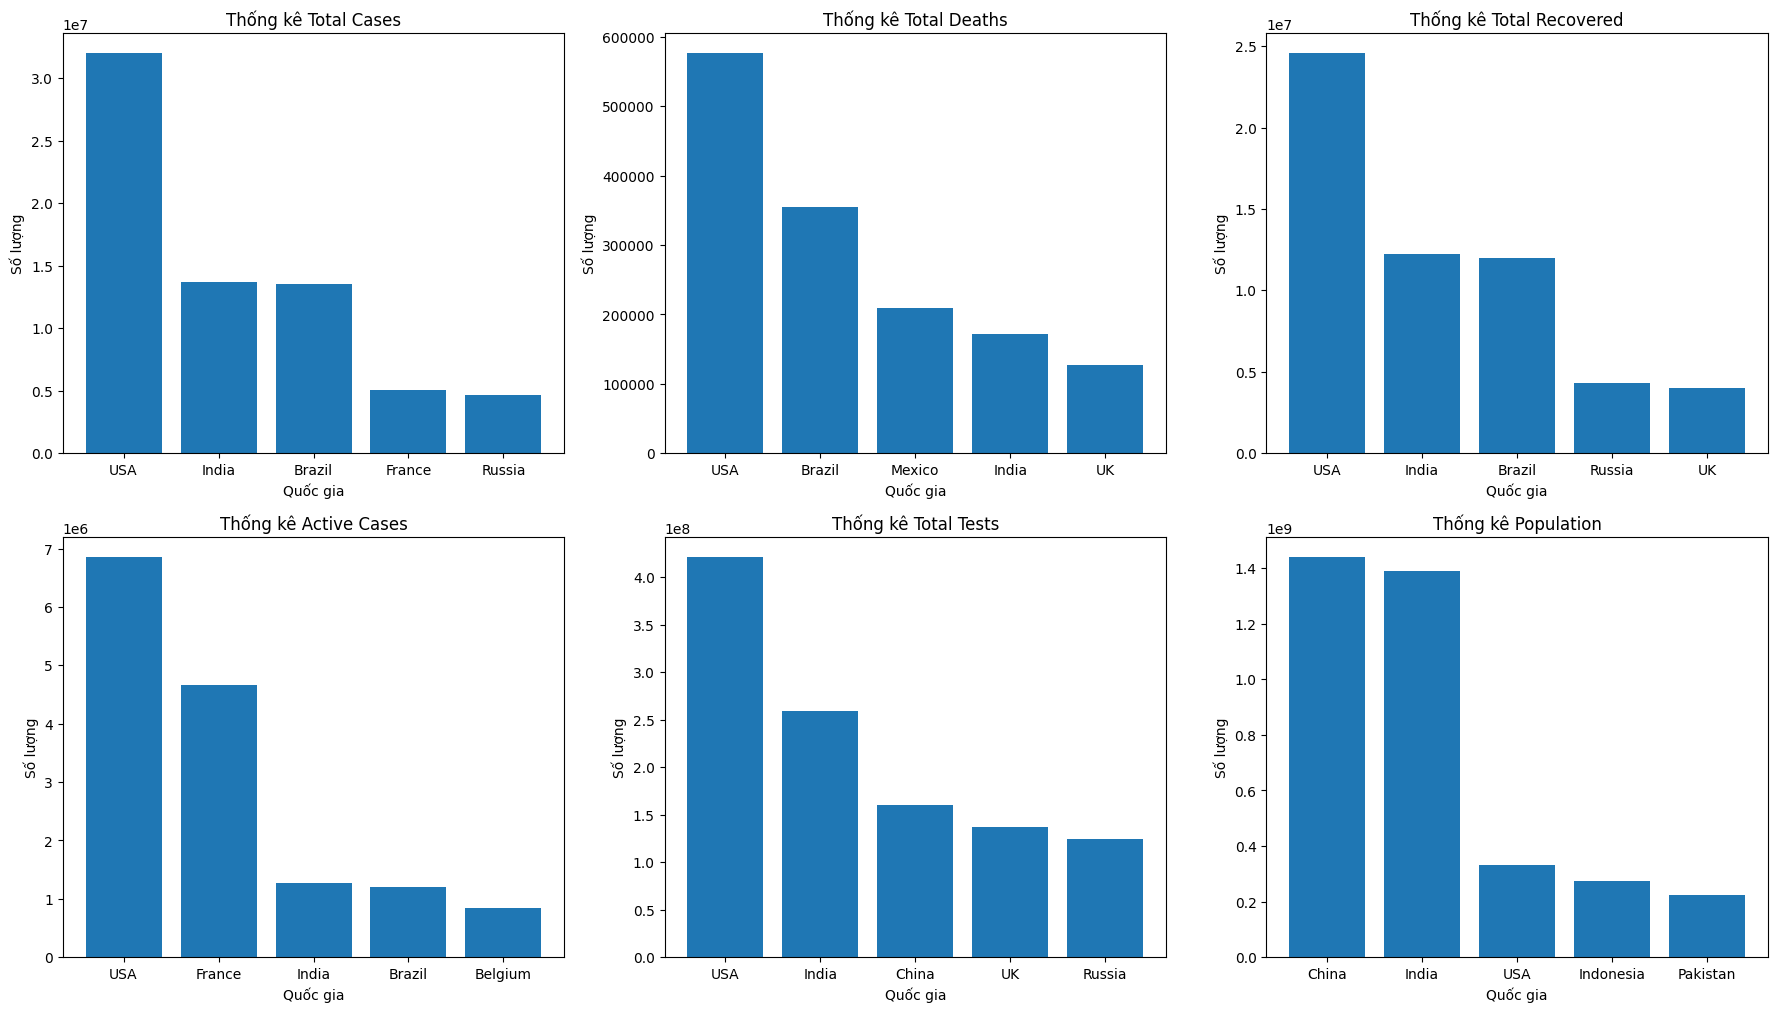

In [13]:
# TODO: draw 6 bar charts
fig, axs = plt.subplots(2, 3, figsize=(22, 12))
for ax in axs.flat:
    ax.set(xlabel="Quốc gia", ylabel="Số lượng")

columns = df.columns[1:]
for column, ax in zip(columns, axs.flatten()):
    ax.set_title(f"Thống kê {column}")
    data = df.sort_values(by=[column], ascending=False)
    ax.bar(data["Country Name"].head(5), height=data[column].head(5))
plt.show()

**TODO**: Comment about the chart

Về mặt tổng quan, ta có thể thấy được rằng Mỹ là quốc gia dẫn đầu trong 5 trên 6 biểu đồ. Trong 5 biểu đồ liên quan đến covid-19 thì Mỹ đều dẫn đầu mặc dù về dân số Mỹ chi đứng thứ 3 sau Trung Quốc và Ấn Độ. Điều này cho ta biết được rẳng tỉ lệ người dân nước Mỹ bị nhiễm Covid-19 là rất cao. Về mặt tương phản thì Trung Quốc có số lượng dân số đứng đầu nhưng tổng số ca nhiễm lại không nằm trong top 5 các nước bị nhiễm nhiều nhất. Thêm nữa ta có thể thấy trong 5 biểu đồ đầu chủ yếu chỉ xuất hiện 6 quốc gia là Mỹ, Ấn Độ, Brazil, Mexico, Pháp và Nga nhưng ở biểu đồ "Active Cases" ta lại thấy có Bỉ trong top 5, điều đó chứng tỏ tỉ lệ chữa khỏi bệnh của Bỉ là rất lớn so với các nước còn lại. Và chính vì tần số xuất hiện của các quốc gia trong 5 biểu đồ như đã nói ở trên thì ta có thể kết luận thêm rằng 5 thuộc tính này có mối tương quan với nhau.

### Requirement #3: Draw world map

- Using bar chart just gives you a little bit information about numbers
- In this requirement, you are going to draw a world map with circles which shows the number of cases for each country. Specifically, you are provided a file named `coord.json` that contains longitude and latitude of each country. You are going to use `Total cases` and `Total Death` to draw the following charts

In [14]:
with open("./data/coord.json") as jsonFile:
    jsonData = json.load(jsonFile)

gdf = pd.DataFrame(jsonData)
gdf['Country Name'] = gdf.index
gdf = pd.merge(gdf, df, on = "Country Name")
gdf['name'] = gdf['Country Name']
gdf.drop(['Country Name', 'Total Recovered', 'Active Cases', 'Total Tests', 'Population'], axis=1, inplace=True)

gdf = geopandas.GeoDataFrame(gdf)
gdf.head()

,lat,long,Total Cases,Total Deaths,name
0,33.0,65.0,57492,2532.0,Afghanistan
1,41.0,20.0,128518,2321.0,Albania
2,28.0,3.0,118645,3134.0,Algeria
3,42.3,1.3,12581,121.0,Andorra
4,-12.3,18.3,23549,554.0,Angola


In [15]:
gdf = gdf.set_geometry(geopandas.points_from_xy(gdf.long, gdf.lat), crs="EPSG:4326")
gdf.head()

,lat,long,Total Cases,Total Deaths,name,geometry
0,33.0,65.0,57492,2532.0,Afghanistan,POINT (65.00000 33.00000)
1,41.0,20.0,128518,2321.0,Albania,POINT (20.00000 41.00000)
2,28.0,3.0,118645,3134.0,Algeria,POINT (3.00000 28.00000)
3,42.3,1.3,12581,121.0,Andorra,POINT (1.30000 42.30000)
4,-12.3,18.3,23549,554.0,Angola,POINT (18.30000 -12.30000)


In [16]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.head(5)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1492720864.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [17]:
# normalized 2 column total cases and total deaths using min_max scale to 0.7->30.7
gdf['Total Cases'] = (gdf['Total Cases'] - gdf['Total Cases'].min()) / (gdf['Total Cases'].max() - gdf['Total Cases'].min()) * 30 + 0.7
gdf['Total Deaths'] = (gdf['Total Deaths'] - gdf['Total Deaths'].min()) / (gdf['Total Deaths'].max() - gdf['Total Deaths'].min()) * 30 + 0.7

C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1522469963.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdfCases['geometry'] = gdf['geometry'].buffer(gdf['Total Cases']).boundary
C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1522469963.py:9: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdfCases['geometry'] = gdf['geometry'].buffer(gdf['Total Cases']).boundary
C:\Users\Admin\AppData\Local\Temp\ipykernel_9132\1522469963.py:16: UserWarning: Geometry is in a geogra

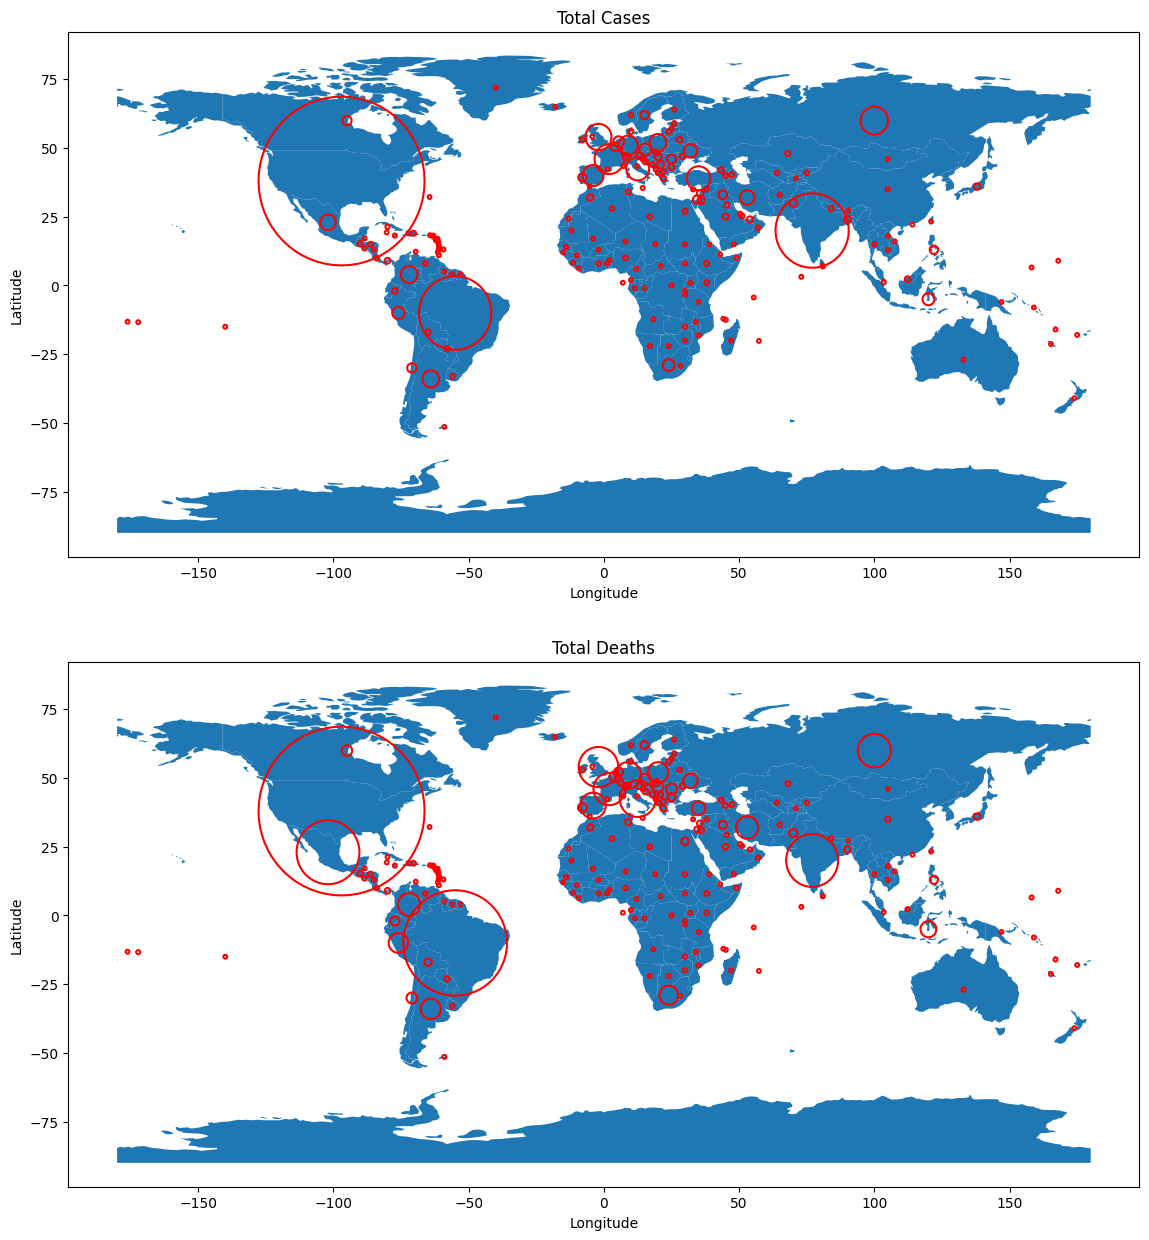

In [18]:
# TODO: draw 2 world map chart using geopandas
gdfCases, gdfDeaths = geopandas.GeoDataFrame(), geopandas.GeoDataFrame()

fig, (ax1, ax2) = plt.subplots(2, figsize = (14, 15))
world.plot(ax = ax1)
ax1.set_title('Total Cases')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
gdfCases['geometry'] = gdf['geometry'].buffer(gdf['Total Cases']).boundary
gdfCases.plot(color = 'red', ax = ax1)

ax2 = world.plot(ax = ax2)
ax2.set_title('Total Deaths')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')
gdfDeaths['geometry'] = gdf['geometry'].buffer(gdf['Total Deaths']).boundary
gdfDeaths.plot(color = 'red', ax = ax2)

plt.show()

**TODO**: Comment about the chart

Từ 2 biểu đồ trên ta thấy được tổng số ca nhiễm và tổng số ca chết chủ yếu tập trung ở các nước thuộc châu Mỹ và châu Âu điển hình với nước Mỹ chiếm số lượng nhiều nhất. Mexico là nước có tỉ lệ nhiễm thấp nhưng tỉ lệ chết lại cao so với các nước khác. Ở châu Phi ta thấy sự phân bố rải rác giữa các quốc gia nhưng tỉ lệ không nhiều so với thế giới (tức là quốc gia nào cũng có ca nhiễm nhưng số lượng không nhiều). Về châu Á ta thấy nổi trội lên là quốc gia Ấn Độ với số ca nhiễm và chết là rất lớn, các quốc gia còn lại chiếm tỉ lệ nhỏ và phân bổ thưa thớt hơn so với châu Phi.

### Requirement #4: Relationship between 2 variables

- Exploring the relationship between variables is a needed task to do
- You will start with exploring the linear relationship between 2 variables. In order to do so, draw $C_6^2=15$ scatter plots. For each plot, draw a line that shows the linear relationship of variables. You should implement the line yourself instead of using library.

In [19]:
def getThetaLine(column1, column2):
    X, y = column1.to_numpy(), column2.to_numpy()
    
    X = X.reshape((X.shape[0], 1))
    Xbar = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    A = Xbar.T @ Xbar
    b = Xbar.T @ y
    w = np.linalg.pinv(A) @ b
    return w


In [20]:
def relationPlot(column1, column2, ax):
    ax.set_title(f'{column1} - {column2}')
    ax.set_xlabel(f'{column1}')
    ax.set_ylabel(f'{column2}')
    ax.scatter(df[column1], df[column2])

    theta = getThetaLine(df[column1], df[column2])
    x_line = np.linspace(-0.05*df[column1].max(), df[column1].max() + 0.05*df[column1].max())
    y_line = x_line * theta[1] + theta[0]
    ax.plot(x_line, y_line, '-', color = 'red')

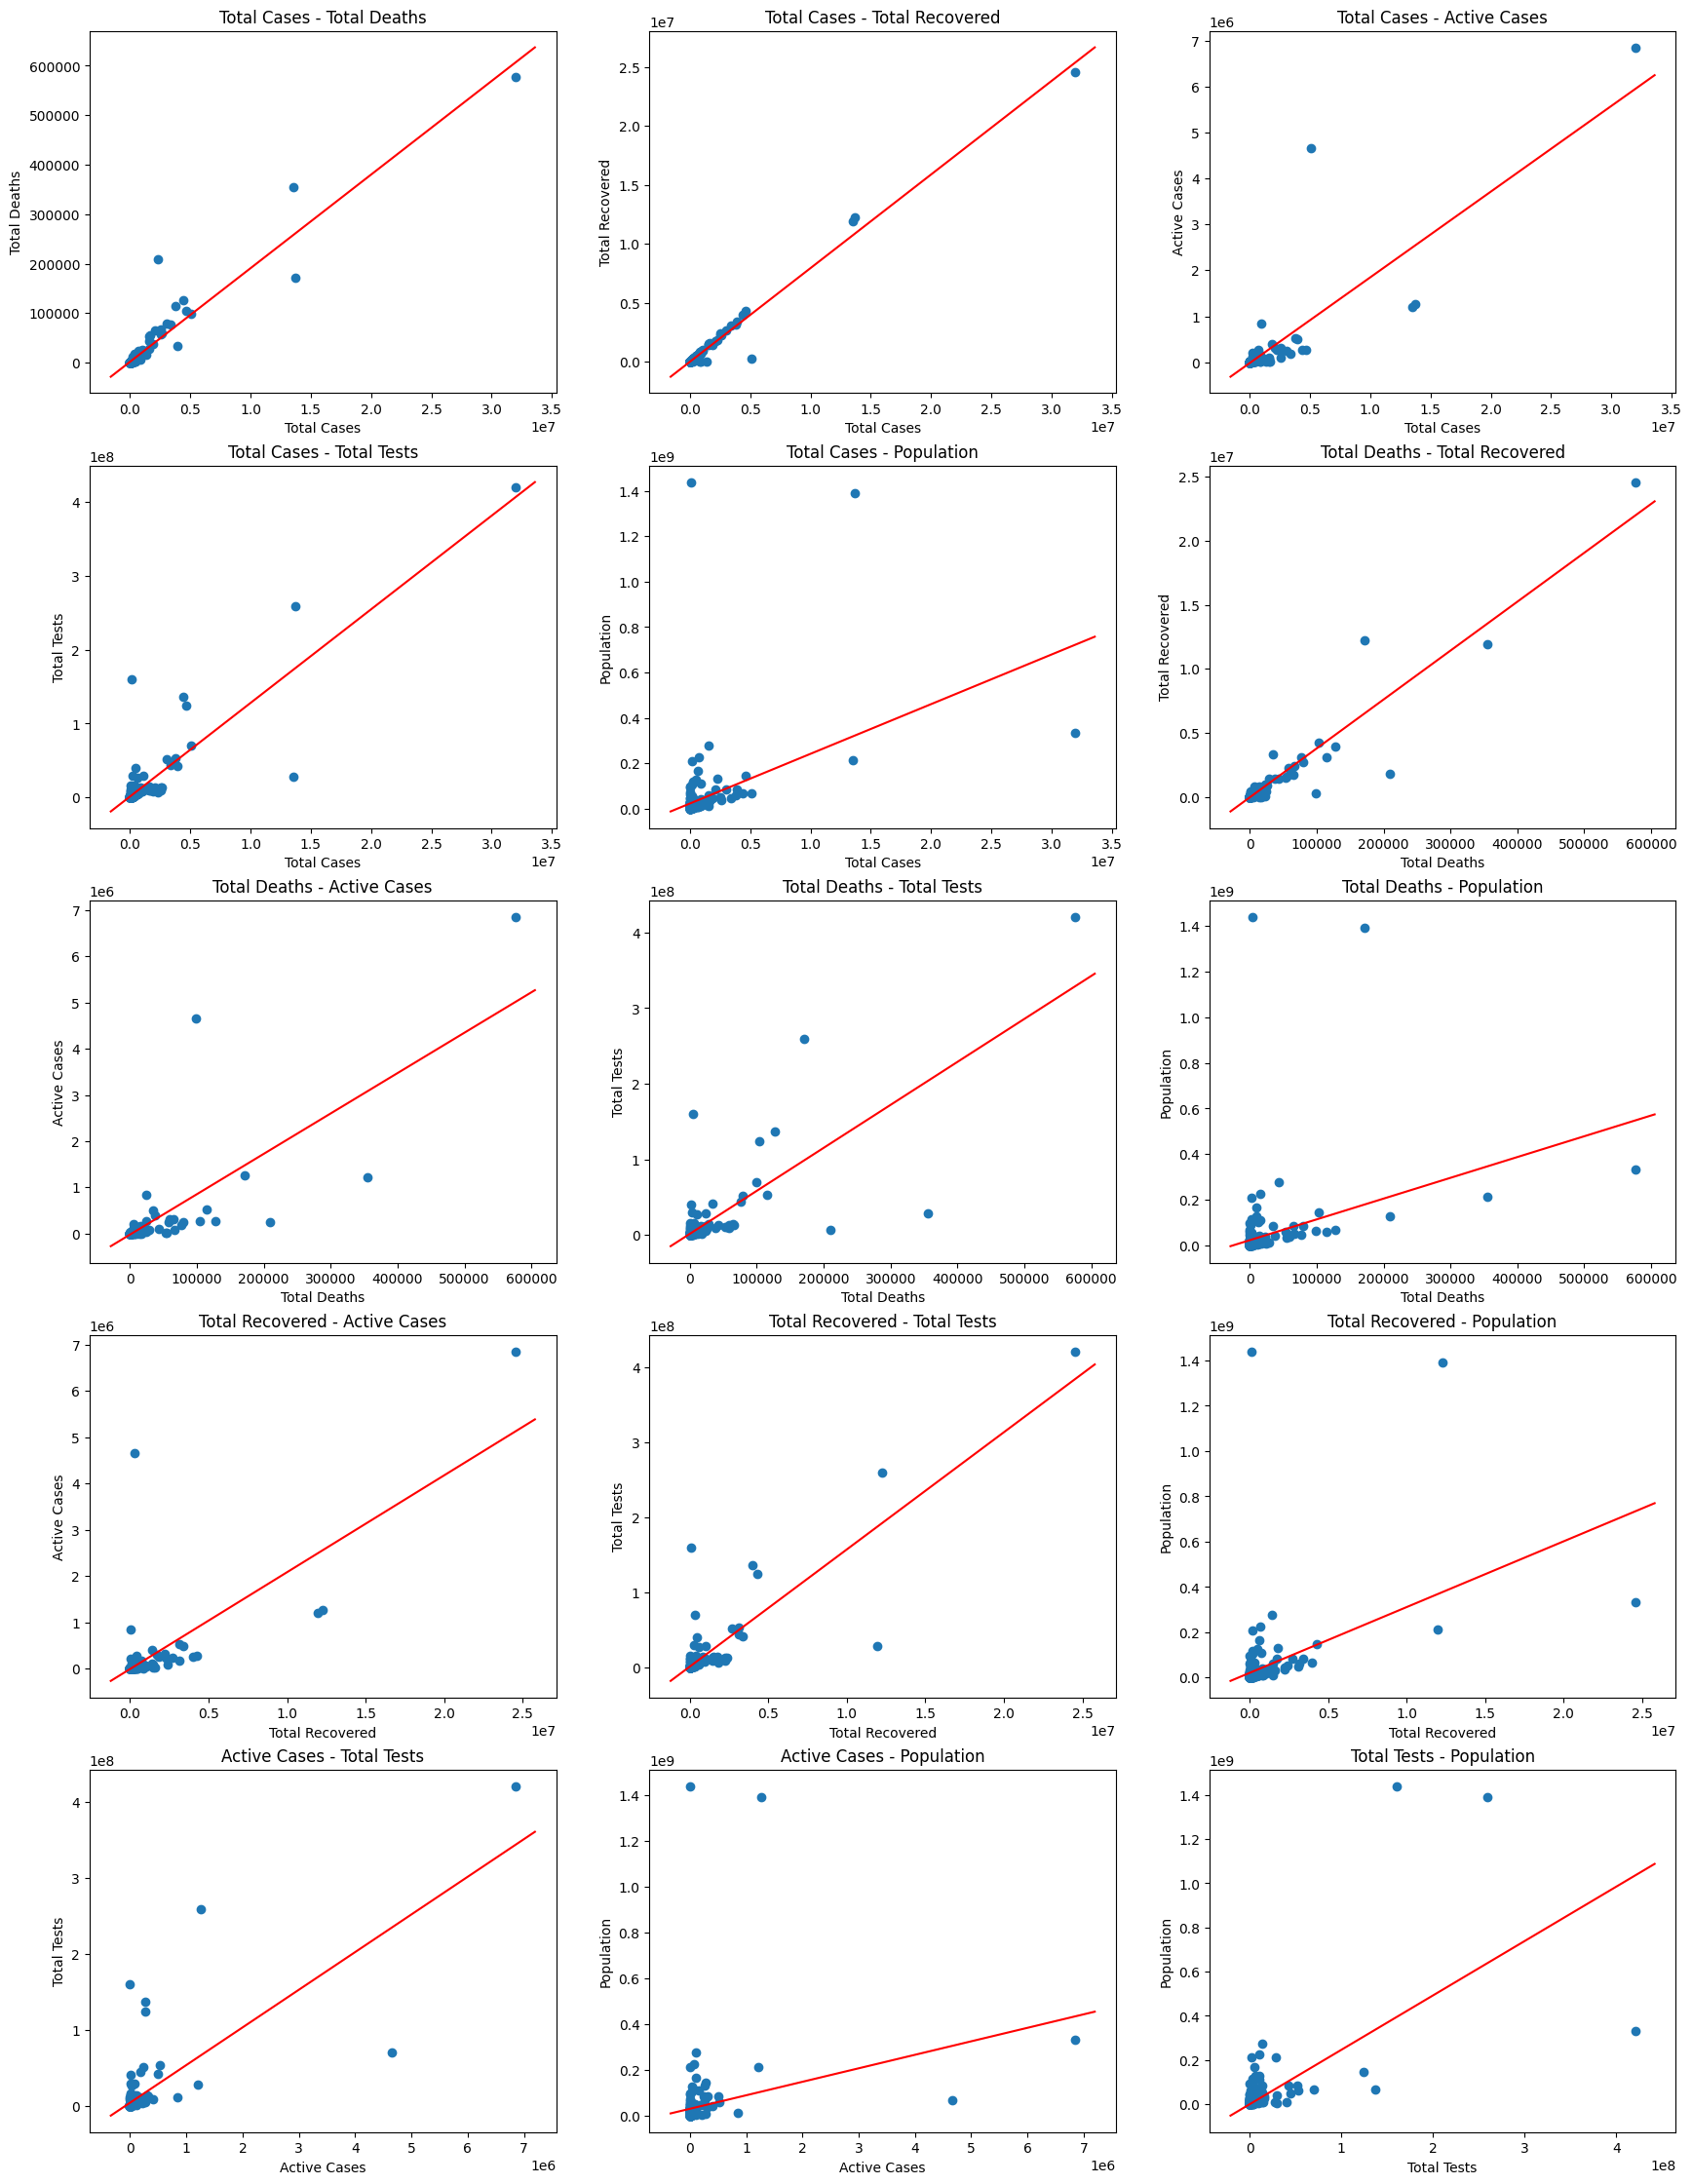

In [21]:
# TODO: scatter stuff
# Drop column Country Name
columns = df.columns[1:]

fig, axs = plt.subplots(5, 3, figsize = (21, 28))
axs = axs.flatten()

flag = 0
for i in range(len(columns) - 1):
    for j in range(i + 1, len(columns)):
        relationPlot(columns[i], columns[j], axs[flag])
        flag += 1

**TODO**: As showed above, give your prediction about the relationship between each pair.

Nhìn vào biểu đồ ta có thể thấy được nhóm Total Cases - Total Deaths - Total Recovered có mối tương quan mạnh mẽ với nhau nhất. Ở chiều ngược lại thuộc tính Population có sự tương quan yếu so với các thuộc tính khác. Chúng ta vẫn có thể liệt kê thêm một số cặp thuộc tính có tương quan mạnh như Total Cases - Total Test, Total Cases - Active Cases và Total Test - Total Recovered. Các cặp còn lại có mức tương quan trung bình với nhau.

### Requirement #5: Double check the relationship between 2 variables

- In order to make sure about the linear relationship, you have to check each pair with **Pearson correlation coefficient**
- Specifically, $\rho$ is calculated as follows:

$$\rho_{X, Y} = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

- Then, plot these 15 values using heatmap

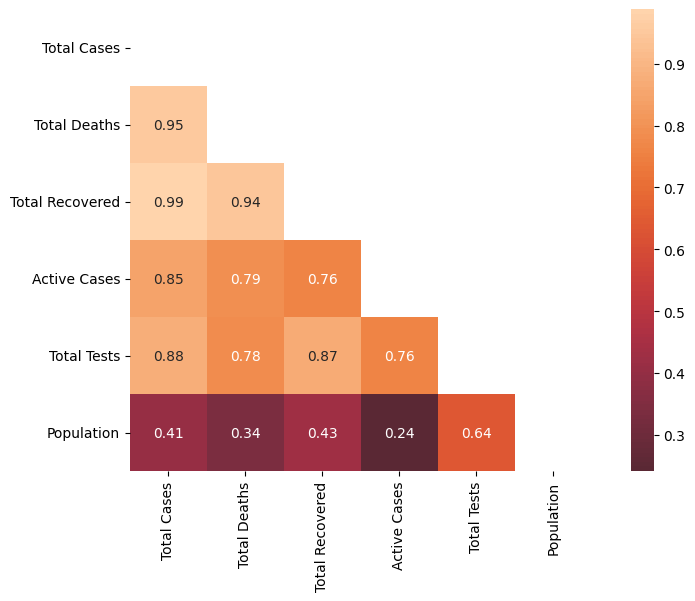

,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Tests,Population
Total Cases,1.000000,0.951657,0.988696,0.847869,0.879253,0.407222
Total Deaths,0.951657,1.000000,0.944121,0.789273,0.783784,0.336439
Total Recovered,0.988696,0.944121,1.000000,0.763274,0.868501,0.433467
Active Cases,0.847869,0.789273,0.763274,1.000000,0.755964,0.241293
Total Tests,0.879253,0.783784,0.868501,0.755964,1.000000,0.637476
Population,0.407222,0.336439,0.433467,0.241293,0.637476,1.000000


In [22]:
# TODO: create heatamp
df_copy = df.copy().drop('Country Name', axis=1)
corr =  df_copy.corr()
# Create a mask
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 6))
sn.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.2f', square=True)

plt.show()
corr

For now, you can check whether your prediction is right or wrong!

## Model visualization

- In this section, we are going to visualize the training and testing process of machine learning model
- The process of training and testing a model is as follow:
    1. Prepare data for training and testing
    2. Create a model
    3. Train and test the model
    4. Visualize the result

- You are required to:
    1. Study Multi-layer neural network and Convolutional neural network
    2. Study `Pytorch` in order to prepare data and design machine learning model
    3. Design 2 models to classify MNIST dataset. Then, visualize the result of each model and compare the result to each other
        - Model 1: A fully-connected model with 4 layers. The input layer has $784$ neurons. The hidden layer #1 has $1024$ neurons, which is followed by a $ReLU$ as activation functions. The hidden layer #2 has $512$ neurons, also followed by a $ReLU$ as activation functions. The output layer has $10$ neurons (of course), which follows by a $LogSoftmax$ function
        - Model 2: A CNN model with 2 Convolution layers and 1 linear layer. All the CNN layers have 20 filters, kernel size equal to $5$. Each of them is followed by a $ReLU$ activation function and a MaxPooling2D layer ($kernel\_size=2$). The linear layer is followed by a $LogSoftmax$ activation function

- Google Colab can be used since it provides free GPU, which makes your training and testing process faster

### Requirement #6: Prepare data

- `Pytorch` supports a lot of datasets for running machine learning model. In this lab, we use MNIST dataset. So, download the training set and the testing set using `Pytorch` and store them in `./data`
- Note that you have to transform your data into `tensor` (a datatype that's quite similar to `numpy array`) so you can input to model
- After that, create `train_dataloader` and `test_dataloader`

**TODO**: Explain why we have to create dataloader <br>

Việc create dataloader để chúng ta có thể load data vào mô hình học. Ban đầu dataset chỉ chứa data và chưa được phân thành các batch data nhỏ hơn để thích hợp trong việc học máy. Dataloader sẽ chia nhỏ data từ tập dataset thành các batch và sẽ duyệt qua các batch cho vào mô hình học máy. Dataset chỉ có thể duyệt qua một sample trong một khoảng thời gian còn dataloader có thể duyệt nhiều sample theo các minibatches và xáo trộn dữ liệu sau mỗi epoch để giảm thiểu overfitting.

In [23]:
# TODO: download training, testing data and store them into training_data and testing_data
# Then, create train_dataloader and test_dataloader with batch_size=32
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)



In [24]:
batch_size = 32

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64


- After downloading the data, visualize 10 random samples (2 rows, 5 samples for each row) from training set.

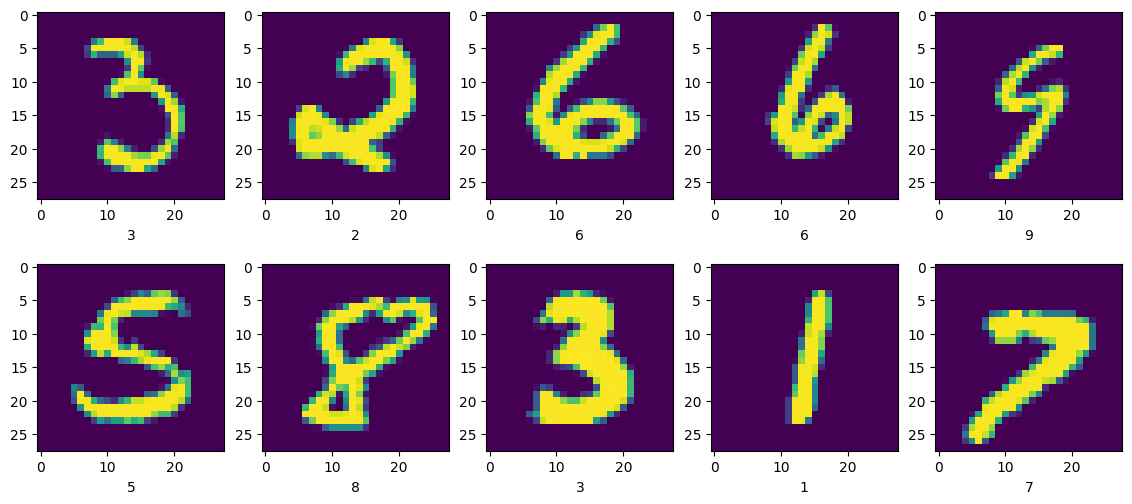

In [25]:
# TODO: visualize 10 random samples
# Display sample data
fig, axs = plt.subplots(2, 5, figsize=(14, 6))

for ax in axs.flat:
    idx = torch.randint(len(test_data), size=(1,)).item()
    img, label = test_data[idx]
    ax.set_xlabel(label)
    ax.imshow(img.squeeze(), cmap="viridis")

plt.show()

### Requirement #7: Create models

- Create 2 models as mentioned above. Call them `Mnist_FC` and `Mnist_CNN`
- **I strongly recommend that you should slowly implement, print out the output and its shape of each layer in order to get a deep understanding of what you are trying to do**
- Before moving to the next requirement, you should test your model with a random sample of the dataset. In case you create code cells for testing, remember to remove these cells

In [26]:
# TODO: create Mnist_FC and Mnist_CNN
class Mnist_FC(nn.Module):
    def __init__(self):
        super(Mnist_FC, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
            nn.LogSoftmax()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
    
class Mnist_CNN(nn.Module):
    def __init__(self):
        super(Mnist_CNN, self).__init__()
        self.flatten = nn.Flatten()
        # initialize first set of CONV => RELU => POOL layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20,
                         kernel_size=(5, 5))
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
		# initialize second set of CONV => RELU => POOL layers
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=20,
			             kernel_size=(5, 5))
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))

        # initialize our softmax classifier
        self.fc2 = nn.Linear(in_features=4*4*20, out_features=10)
        self.logSoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        # pass the input through our first set of CONV => RELU =>
		# POOL layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        # pass the output from the previous layer through the second
        # set of CONV => RELU => POOL layers
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        # flatten the output from the previous layer and pass it
        # through our only set of FC => RELU layers
        x = self.flatten(x)

        # predictions
        x = self.fc2(x)
        output = self.logSoftmax(x)
        # return the output predictions
        return output

### Requirement #8: Train and test models

- Design `train` and `test` function with the parameters provided in the following code cell
    - `train` function trains the model with all the data in training set
    - `test` function tests the model with all data in testing set

- Return the accuracy (e.g. $0.847351$) after training and testing

**TODO**: Explain the parameters of `train` and `test` function. In `test` function, there is a line of code that says `with torch.no_grad()`. Why do we have this line of code?<br>

**Train function parameters:**
- dataloader: Là một tập dữ liệu data được chia thành nhiều batch với mỗi batch size bằng 32. Chúng ta sẽ lần lượt duyệt qua từng batch này để học.
- model: Model để truyền dữ liệu vào học (trong bài toán này ta dùng 2 model là FC và CNN).
- loss_fn: Định nghĩa loss function để model có thể thay đổi các tham số.
- optimizer: Thuật toán tối ưu các tham số của model. <br>

**Test function parameters:**
- dataloader: Là một tập dữ liệu data được chia thành nhiều batch với mỗi batch size bằng 32. Chúng ta sẽ lần lượt duyệt qua từng batch này để test.
- model: Model để truyền dữ liệu vào test (trong bài toán này ta dùng 2 model là FC và CNN). <br>

**Tại sao phải có dòng `with torch.no_grad()`:** Dòng lệnh này sẽ ngăn cản việc thay đổi tham số bằng gradient descent. Vì trong tập test chúng ta chỉ đang kiểm tra dự đoán so với kết quả chứ không dùng chính cái này để quay ngược lại thay đổi tham số. Nếu dòng này bị bỏ đi thì tập test lúc này sẽ có thể làm thay đổi tham số và nó sẽ hoạt động giống như tập train.

In [27]:
# TODO: design train and test function

# check gpu
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f'Using {device} for training and testing')

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    correct = 0
    for _, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    correct = correct / size
    print(f"Train Accuracy: {correct}")
    return correct


def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    correct = 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    correct /= size
    print(f"Test Accuracy: {correct}")
    return correct

Using cpu for training and testing


- Run 20 epochs for each model. In order to do so, at fist, you have to define `learning_rate, loss_fn` and `optimizer`. I will help you on that

- Save the history of training and testing process as `history_fc` and `history_cnn`. During the running process, you should print out the accuracy in order to keep track

- The history is a dictionary with the following structure:

```python
history = {
    1: [0.6, 0.5], # the key (type: int) is the epoch
    2: [0.7, 0.6], # the value (type: list) contains the accuracy of training and testing process at the corresponding epoch
    ...
}
```

**TODO**: List out some loss functions and optimizers that you have heard about <br>
**Loss functions:**
- Cross-Entropy: Đo lường dựa vào tỉ lệ sai số ở kết quả dự đoán so với mẫu thực tế. Giá trị của mỗi mẫu là một tỉ lệ nằm trong khoảng [0, 1].
- Hinge: Được dùng trong các bài toán phân lớp, chủ yếu trong bài SVM dùng để đo khoảng cách sai lệch.
- Huber: là một hàm số được tìm ra bởi Huber và ít nhạy cảm hơn so với độ đo MSE.
- Kullback-leibler: Đo lường dựa vào tỉ lệ phân bố của biến P so với một phân bổ khác, như tỉ lệ phân bổ của Q => P(P||Q).
- Mean Square Error(MSE): Trung bình bình phương khoảng cách của giá trị dự đoán và giá trị thật.
- Root Mean Square Error (RMSE): căn bậc 2 của độ đo MSE.
- Mean Absolute Error(MAE): Trung bình giá trị tuyệt đối khoảng cách của giá trị dự đoán và giá trị thật. 

**Optimizers:**
- Gradient Descent (GD): Trực tiếp sử dụng đạo hàm trên loss function và learning rate để tìm kiếm minimum.
- Stochastic Gradient Descent(SGD): Là một biến thể của GD khi các tham số thay đổi liên tục qua các vòng lặp.
- Mini-Batch Gradient Descent: Một biến thể khác của GD khi các tham số thay đổi sau một batch nhỏ.
- Momentum Based Gradient Descent: Giống như GD nhưng sẽ có thêm quán tính tức là giá trị sẽ thay đổi thêm một lượng nhỏ theo quán tính khi đạo hàm tại một điểm đổi chiều.
- Nesterov Accelerated Gradient (NAG): Khi cập nhật các tham số sẽ thay đổi theo lịch sử trước tiên sau đó chỉ đạo hàm tính toán hướng di chuyển tiến hoặc lùi.
- Adagrad: Thay đổi learning rate sau mỗi vòng lặp dựa vào sự thay đổi của các tham số.
- RMSProp: Là sự cải tiếng của Adagrad. Chú trọng vào việc giảm thiểu sự phức tạp của learning rate bằng cách lấy trung bình cấp số nhân của Gradient bình phương.
- Adam: Nó là sự kết hợp giữa RMSProp và GD.

In [28]:
# define model
model_FC = Mnist_FC()
loss_fn = nn.CrossEntropyLoss()
learning_rate = 1e-3
optimizer_FC = torch.optim.SGD(model_FC.parameters(), lr=learning_rate)
epochs = 20


model_CNN = Mnist_CNN()
optimizer_CNN = torch.optim.SGD(model_CNN.parameters(), lr=learning_rate)

history_FC, history_CNN = {}, {}
print(model_FC)
print("======================================================")
print(model_CNN)

Mnist_FC(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
    (5): LogSoftmax(dim=None)
  )
)
Mnist_CNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc2): Linear(in_features=320, out_features=10, bias=True)
  (logSoftmax): LogSoftmax(dim=1)
)


In [29]:
# TODO: run 20 epochs for Mnist_FC and Mnist_CNN
print("========== FC model ==========")
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_accurancy = train(train_dataloader, model_FC, loss_fn, optimizer_FC)
    test_accurancy = test(test_dataloader, model_FC)
    history_FC[epoch+1] = [train_accurancy, test_accurancy]
    print("")
print("Done!")


print("========== CNN model ==========")
for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_accurancy = train(train_dataloader, model_CNN, loss_fn, optimizer_CNN)
    test_accurancy = test(test_dataloader, model_CNN)
    history_CNN[epoch+1] = [train_accurancy, test_accurancy]
    print("")
print("Done!")

========== FC model ==========
Epoch 1
-------------------------------


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\module.py:1518: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Train Accuracy: 0.4565166666666667
Test Accuracy: 0.6684

Epoch 2
-------------------------------
Train Accuracy: 0.6943833333333334
Test Accuracy: 0.7238

Epoch 3
-------------------------------
Train Accuracy: 0.74465
Test Accuracy: 0.7864

Epoch 4
-------------------------------
Train Accuracy: 0.80355
Test Accuracy: 0.8258

Epoch 5
-------------------------------
Train Accuracy: 0.8335333333333333
Test Accuracy: 0.8498

Epoch 6
-------------------------------
Train Accuracy: 0.8543166666666666
Test Accuracy: 0.8663

Epoch 7
-------------------------------
Train Accuracy: 0.8684833333333334
Test Accuracy: 0.8797

Epoch 8
-------------------------------
Train Accuracy: 0.8780666666666667
Test Accuracy: 0.8889

Epoch 9
-------------------------------
Train Accuracy: 0.8848
Test Accuracy: 0.8946

Epoch 10
-------------------------------
Train Accuracy: 0.89035
Test Accuracy: 0.8978

Epoch 11
-------------------------------
Train Accuracy: 0.8943833333333333
Test Accuracy: 0.9001

Epoch

In [30]:
df_history_FC = pd.DataFrame.from_dict(history_FC)
df_history_FC = df_history_FC.T
df_history_FC.columns = ['Train Accuracy', 'Test Accuracy']
df_history_FC.head(5)

,Train Accuracy,Test Accuracy
1,0.456517,0.6684
2,0.694383,0.7238
3,0.744650,0.7864
4,0.803550,0.8258
5,0.833533,0.8498


In [31]:
df_history_CNN = pd.DataFrame.from_dict(history_CNN)
df_history_CNN = df_history_CNN.T
df_history_CNN.columns = ['Train Accuracy', 'Test Accuracy']
df_history_CNN.head(5)

,Train Accuracy,Test Accuracy
1,0.472717,0.7643
2,0.825450,0.8667
3,0.879917,0.8903
4,0.898250,0.9052
5,0.910033,0.9168


### Requirement #9: Visualize

- Produce a graph as the following code cell and comment about the running process of 2 models

**TODO**: Your comment

Biểu đồ thể hiện sự thay đổi của accuracy ở 2 thuật toán. Nhìn một cách tổng quát ta có thể thấy được 2 thuật toán đều cho sự chính xác tăng dần qua mỗi epoch. Tại mỗi epoch ta có thể thấy được độ chính xác của tập test sẽ cao hơn tập train. Ở cả 2 thuật toán độ chính xác tăng mạnh qua các epoch đầu và tăng nhẹ hơn ở các epoch sau. Về chi tiết ta có thể nhận xét rằng model CNN cho ra kết quả chính xác hơn model FC sau 20 epochs với độ chính xác lần lượt xấp xỉ là 0.96 so với 0.91. Nhưng bù lại thời gian chạy của model CNN sẽ lâu hơn model FC.

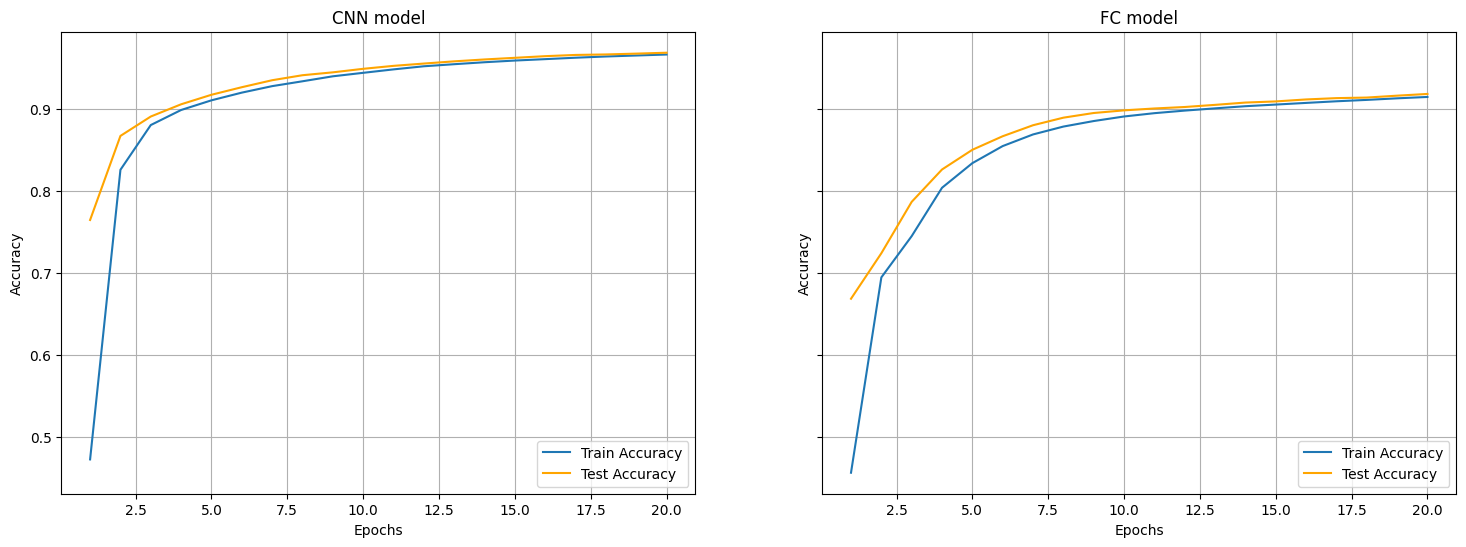

In [32]:
# TODO: visualize the history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
ax1.set_title("CNN model")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.grid()
CNN_lg1, = ax1.plot(df_history_CNN['Train Accuracy'])
CNN_lg2, = ax1.plot(df_history_CNN['Test Accuracy'], color = 'orange')
ax1.legend([CNN_lg1, CNN_lg2], ['Train Accuracy', 'Test Accuracy'], loc = 'lower right')

ax2.set_title("FC model")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.grid()
FC_lg1, = ax2.plot(df_history_FC['Train Accuracy'])
FC_lg2, = ax2.plot(df_history_FC['Test Accuracy'], color = 'orange')
ax2.legend([FC_lg1, FC_lg2], ['Train Accuracy', 'Test Accuracy'], loc = 'lower right')
plt.show()

- Highly recommend you go play around with the parameters of models and re-implement 2 models using `TensorFlow` on Colab